Build a regression model.

In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("/content/bike_poi.db")


query = "SELECT * FROM bike_poi_data"
df = pd.read_sql(query, conn)

conn.close()

print(df.head())


             bike station                      poi name  \
0         Mobi Shaw Go HQ                   Sopra Sotto   
1         Mobi Shaw Go HQ          Harbour Oyster + Bar   
2  Mobi 0027 Bike Station  OEB Breakfast Co. - Yaletown   
3         Mobi Shaw Go HQ           Via Tevere Pizzeria   
4         Mobi Shaw Go HQ                    Lunch Lady   

                               category  rating  review count  latitude  \
0                        Pizza, Italian     4.0           156  49.27111   
1  Cocktail Bars, Seafood, Fish & Chips     4.1            87  49.27189   
2                    Breakfast & Brunch     4.3           955  49.27348   
3              Italian, Pizza, Desserts     4.1           361  49.27388   
4                            Vietnamese     4.1           280  49.27497   

   longitude_x                                           yelp url  \
0   -123.06947  https://www.yelp.com/biz/sopra-sotto-vancouver...   
1   -123.06918  https://www.yelp.com/biz/harbour-oyster-

In [5]:
print(df.columns)


Index(['bike station', 'poi name', 'category', 'rating', 'review count',
       'latitude', 'longitude_x', 'yelp url', 'id', 'name', 'longitude_y',
       'timestamp', 'free_bikes', 'empty_slots', 'extra.uid', 'extra.renting',
       'extra.returning', 'extra.last_updated', 'extra.slots',
       'extra.normal_bikes', 'extra.ebikes', 'extra.has_ebikes'],
      dtype='object')


In [6]:

df["timestamp"] = pd.to_datetime(df["timestamp"])


df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.day_name()


print(df[["timestamp", "hour", "day_of_week"]].head())


                         timestamp  hour day_of_week
0 2025-01-31 05:59:41.842352+00:00     5      Friday
1 2025-01-31 05:59:41.832017+00:00     5      Friday
2 2025-01-31 05:59:41.782281+00:00     5      Friday
3 2025-01-31 05:59:41.795901+00:00     5      Friday
4 2025-01-31 05:59:41.833295+00:00     5      Friday


In [7]:
import statsmodels.api as sm


Y = df["free_bikes"]


X = df[["rating", "review count", "latitude", "longitude_x",
        "hour", "extra.slots", "extra.ebikes", "extra.normal_bikes"]]


X = sm.add_constant(X)


In [8]:

model = sm.OLS(Y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.374e+25
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:47:34   Log-Likelihood:                 3901.2
No. Observations:                 160   AIC:                            -7786.
Df Residuals:                     152   BIC:                            -7762.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
rating             -5.274e-16   1.24

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


summary_stats = df[["extra.ebikes", "extra.normal_bikes"]].agg(["mean", "std", "min", "max", "median"])


summary_stats = summary_stats.T


import IPython.display as ipd
ipd.display(summary_stats)



,mean,std,min,max,median
extra.ebikes,1.42500,1.494434,0.0,6.0,1.0
extra.normal_bikes,9.38125,6.596046,0.0,24.0,11.0


Provide model output and an interpretation of the results.

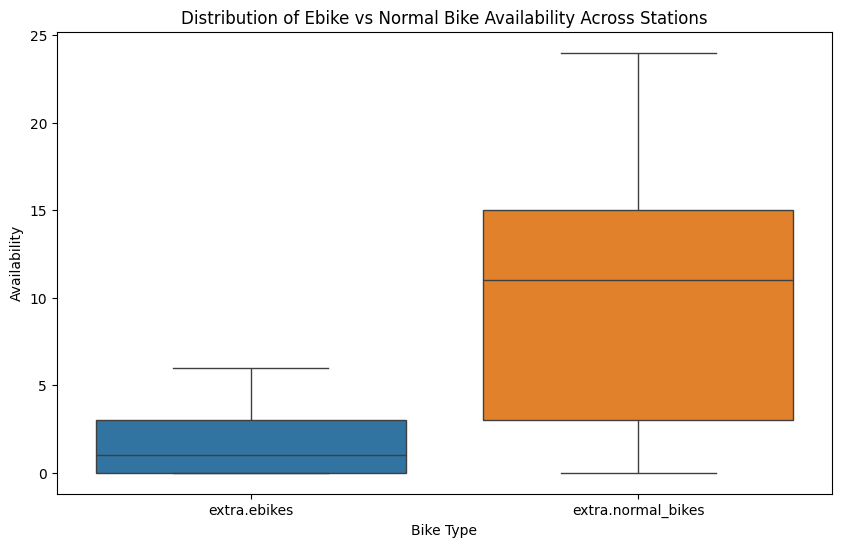

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[["extra.ebikes", "extra.normal_bikes"]])
plt.xlabel("Bike Type")
plt.ylabel("Availability")
plt.title("Distribution of Ebike vs Normal Bike Availability Across Stations")
plt.show()





# Stretch

How can you turn the regression model into a classification model?